In [3]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of records
n = 500

# Generate realistic data
cgpa = np.round(np.random.normal(7.0, 1.0, n), 2)                 # CGPA around 7.0 ± 1.0
internships = np.random.randint(0, 4, n)                          # 0 to 3 internships
projects = np.random.randint(1, 6, n)                             # 1 to 5 projects
aptitude = np.round(np.random.uniform(40, 100, n), 2)            # Aptitude score 40-100
communication = np.round(np.random.uniform(40, 100, n), 2)       # Communication skills

# Simulate PlacementChance (target) based on weighted formula + some noise
placement_chance = (
    0.3 * (cgpa / 10) +
    0.15 * (internships / 3) +
    0.2 * (projects / 5) +
    0.2 * (aptitude / 100) +
    0.15 * (communication / 100) +
    np.random.normal(0, 0.05, n)  # noise
)

# Ensure PlacementChance is between 0 and 1
placement_chance = np.clip(placement_chance, 0, 1)
placement_chance = np.round(placement_chance, 2)

# Create dataframe
df = pd.DataFrame({
    'CGPA': cgpa,
    'Internships': internships,
    'Projects': projects,
    'AptitudeScore': aptitude,
    'CommunicationSkills': communication,
    'PlacementChance': placement_chance
})

# Save to CSV
df.to_csv("new_placement_data.csv", index=False)
print("✅ Dataset saved as placement_data.csv")


✅ Dataset saved as placement_data.csv


In [4]:
df.head()

,CGPA,Internships,Projects,AptitudeScore,CommunicationSkills,PlacementChance
0,7.50,1,2,89.29,42.28,0.61
1,6.86,3,2,42.47,84.77,0.66
2,7.65,1,3,80.22,79.54,0.66
3,8.52,2,4,97.09,88.13,0.75
4,6.77,3,4,47.45,46.32,0.60


In [5]:
df.isnull().sum()

CGPA                   0
Internships            0
Projects               0
AptitudeScore          0
CommunicationSkills    0
PlacementChance        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CGPA                 500 non-null    float64
 1   Internships          500 non-null    int32  
 2   Projects             500 non-null    int32  
 3   AptitudeScore        500 non-null    float64
 4   CommunicationSkills  500 non-null    float64
 5   PlacementChance      500 non-null    float64
dtypes: float64(4), int32(2)
memory usage: 19.7 KB


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [8]:
df = pd.read_csv("new_placement_data.csv")

In [10]:
df.head()

,CGPA,Internships,Projects,AptitudeScore,CommunicationSkills,PlacementChance
0,7.50,1,2,89.29,42.28,0.61
1,6.86,3,2,42.47,84.77,0.66
2,7.65,1,3,80.22,79.54,0.66
3,8.52,2,4,97.09,88.13,0.75
4,6.77,3,4,47.45,46.32,0.60


In [11]:
df.tail()

,CGPA,Internships,Projects,AptitudeScore,CommunicationSkills,PlacementChance
495,7.54,0,2,92.95,68.18,0.58
496,5.96,2,2,46.34,66.85,0.48
497,6.81,0,2,99.30,68.46,0.56
498,6.12,3,2,66.60,75.45,0.67
499,5.62,2,2,42.87,72.22,0.62


In [12]:
# Check for Missing Values & Handle
df.fillna(df.mean(), inplace=True)

# placementchance is the target value

In [13]:
X = df.drop("PlacementChance", axis=1)
y = df["PlacementChance"]

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:
# Train the Model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(X_test)

#Checking for the results

In [18]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)


In [24]:
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.6701
MSE: 0.0032
RMSE: 0.0565
MAE: 0.0444


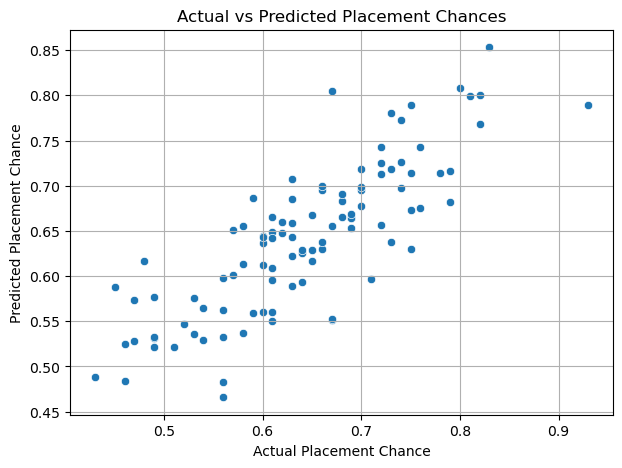

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Placement Chance")
plt.ylabel("Predicted Placement Chance")
plt.title("Actual vs Predicted Placement Chances")
plt.grid(True)
plt.show()
